Install necessary libraries

In [ ]:
pip install yfinance

In [ ]:
pip install shap

Import necessary libraries

In [21]:
import urllib.request, json
import requests
from requests import Request, Session
from requests.auth import HTTPBasicAuth
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from datetime import datetime
import datetime as dt
import pytz
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from pandas import * 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import random

**Seeking Cointegrated pairs based on p-values**

Getting list of S&P stocks (defined function included for reference only), output directly applied to next cell

In [27]:
#def fmp_data():
#  with urllib.request.urlopen('https://financialmodelingprep.com/api/v3/sp500_constituent?apikey=[INSERT YOUR API KEY]') as url:
#    data = json.loads(url.read().decode())
#    df = pd.DataFrame(json_normalize(data))
#    df.drop(['open', 'low','high','date'], axis=1, inplace=True)
#    return list(df['symbol'])

Performance data of latest S&P 500 Stocks over past 3 years

In [28]:
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2022, 1, 1)
# ticker info from Financial Modeling Prep API, see above for function used (API key removed for confidential reasons)
tickers = ['MMM','AOS','ABT','ABBV','ABMD','ACN','ATVI','ADM','ADBE','ADP','AAP','AES','AFL','A','AIG','APD','AKAM','ALK','ALB','ARE','ALGN','ALLE','LNT','ALL','GOOGL','GOOG','MO','AMZN','AMCR','AMD','AEE','AAL','AEP','AXP','AMT','AWK','AMP','ABC','AME','AMGN','APH','ADI','ANSS','ANTM','AON','APA','AAPL','AMAT','APTV','ANET','AJG','AIZ','T','ATO','ADSK','AZO','AVB','AVY','BKR','BLL','BAC','BBWI','BAX','BDX','BRK-B','BBY','BIO','TECH','BIIB','BLK','BK','BA','BKNG','BWA','BXP','BSX','BMY','AVGO','BR','BRO','BF-B','CHRW','CDNS','CZR','CPB','COF','CAH','KMX','CCL','CARR','CTLT','CAT','CBOE','CBRE','CDW','CE','CNC','CNP','CDAY','CERN','CF','CRL','SCHW','CHTR','CVX','CMG','CB','CHD','CI','CINF','CTAS','CSCO','C','CFG','CTXS','CLX','CME',CMS,'KO','CTSH','CL','CMCSA','CMA','CAG','COP','ED','STZ','COO','CPRT','GLW','CTVA','COST','CTRA','CCI','CSX','CMI','CVS','DHI','DHR','DRI','DVA','DE','DAL','XRAY','DVN','DXCM','FANG','DLR','DFS','DISCA','DISCK','DISH','DG','DLTR','D','DPZ','DOV','DOW','DTE','DUK','DRE','DD','DXC','EMN','ETN','EBAY','ECL','EIX','EW','EA','EMR','ENPH','ETR','EOG','EPAM','EFX','EQIX','EQR','ESS','EL','ETSY','RE','EVRG','ES','EXC','EXPE','EXPD','EXR','XOM','FFIV','FDS','FAST','FRT','FDX','FITB','FRC','FE','FIS','FISV','FLT','FMC','F','FTNT','FTV','FBHS','FOXA','FOX','BEN','FCX','GPS','GRMN','IT','GE','GNRC','GD','GIS','GPC','GILD','GL','GPN','GM','GS','GWW','HAL','HIG','HAS','HCA','PEAK','HSIC','HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HWM','HPQ','HUM','HBAN','HII','IEX','IDXX','INFO','ITW','ILMN','INCY','IR','INTC','ICE','IBM','IP','IPG','IFF','INTU','ISRG','IVZ','IPGP','IQV','IRM','JKHY','J','JBHT','SJM','JNJ','JCI','JPM','JNPR','K','KEY','KEYS','KMB','KIM','KMI','KLAC','KHC','KR','LHX','LH','LRCX','LW','LVS','LDOS','LEN','LLY','LNC','LIN','LYV','LKQ','LMT','L','LOW','LUMN','LYB','MTB','MRO','MPC','MKTX','MAR','MMC','MLM','MAS','MA','MTCH','MKC','MCD','MCK','MDT','MRK','FB','MET','MTD','MGM','MCHP','MU','MSFT','MAA','MRNA','MHK','TAP','MDLZ','MPWR','MNST','MCO','MS','MOS','MSI','MSCI','NDAQ','NTAP','NFLX','NWL','NEM','NWSA','NWS','NEE','NLSN','NKE','NI','NSC','NTRS','NOC','NLOK','NCLH','NRG','NUE','NVDA','NVR','NXPI','ORLY','OXY','ODFL','OMC','OKE','ORCL','OGN','OTIS','PCAR','PKG','PH','PAYX','PAYC','PYPL','PENN','PNR','PBCT','PEP','PKI','PFE','PM','PSX','PNW','PXD','PNC','POOL','PPG','PPL','PFG','PG','PGR','PLD','PRU','PEG','PTC','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RL','RJF','RTX','O','REG','REGN','RF','RSG','RMD','RHI','ROK','ROL','ROP','ROST','RCL','SPGI','CRM','SBAC','SLB','STX','SEE','SRE','NOW','SHW','SBNY','SPG','SWKS','SNA','SEDG','SO','LUV','SWK','SBUX','STT','STE','SYK','SIVB','SYF','SNPS','SYY','TMUS','TROW','TTWO','TPR','TGT','TEL','TDY','TFX','TER','TSLA','TXN','TXT','TMO','TJX','TSCO','TT','TDG','TRV','TRMB','TFC','TWTR','TYL','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI','UHS','VLO','VTR','VRSN','VRSK','VZ','VRTX','VFC','VIAC','VTRS','V','VNO','VMC','WRB','WAB','WMT','WBA','DIS','WM','WAT','WEC','WFC','WELL','WST','WDC','WRK','WY','WHR','WMB','WLTW','WYNN','XEL','XLNX','XYL','YUM','ZBRA','ZBH','ZION','ZTS']
df = pdr.get_data_yahoo(tickers, start, end)['Close']

[*********************100%***********************]  505 of 505 completed


Imputing null values

In [29]:
df = df.fillna(df.mean())

Define a function to find highly significant cointegration pairs with p-value below 0.01

In [32]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            pvalue = result[1]
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.01:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

In [33]:
pvalues, pairs = find_cointegrated_pairs(df)

Using the defined function, we have the S&P 500 stock pairs that are cointegrated at 99% confidence level, we randomly pick a pair for further assessment.

In [34]:
coin_pair = random.choice(pairs)

In [40]:
S1 = df[coin_pair[0]]
S2 = df[coin_pair[1]]
score, pvalue, _ = coint(S1, S2)
print("Coin pair "+coin_pair[0]+" and "+coin_pair[1]+" with conintegration at p-value = "+str(pvalue)+" is picked")

Coin pair FOXA and HES with conintegration at p-value = 0.007270235414336516 is picked


#### Calculating the Price Ratios

Using the Z-score approach to normalize price ratio of the two stocks in time series, we can gauge any price mismatch that deviates from the cointegrated stock pairs' price ratio normal distributions.

In [ ]:
S1 = sm.add_constant(S1)
S1 = S1[coin_pair[0]]
ratio = S1/S2

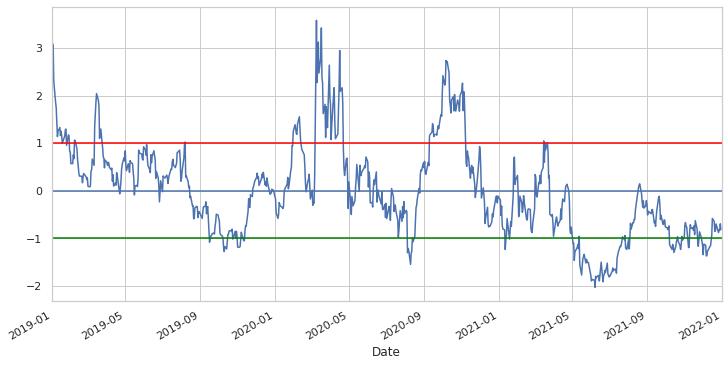

In [42]:
def zscore(series):
    return (series - series.mean()) / np.std(series)
zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2019-01-01', '2022-01-01')
plt.show()

In [44]:
ratios = df[coin_pair[0]] / df[coin_pair[1]] 


#### Back test assessment

A trading strategy in pairs trading can be formulated using a longer term moving average of the price ratio as a baseline and compare to that with a shorter time frame. This could provide indication as to whether the ratio deviated from baseline pattern. 
In the following cells, the price ratio at **21** day Moving Average is compared against **5** day Moving Average.

In [47]:
ratios_mavg5 = ratios.rolling(window=5, center=False).mean()
ratios_mavg21 = ratios.rolling(window=21, center=False).mean()
std_21 = ratios.rolling(window=21, center=False).std()
zscore_21_5 = (ratios_mavg5 - ratios_mavg21)/std_21

Deviations are normalised by Z-score approach and ± 1 from the mean would be used trading signals.
This is because astandard normal distribution has a mean of 0 and a standard deviation 1. As observed, normalized price ratio tends to revert back towards the mean. Thus, trading signal can be outlined based on the above logic as follows:
* Long (+) when normalized price ratio < -1
* Short(-) when normalized price ratio > 1

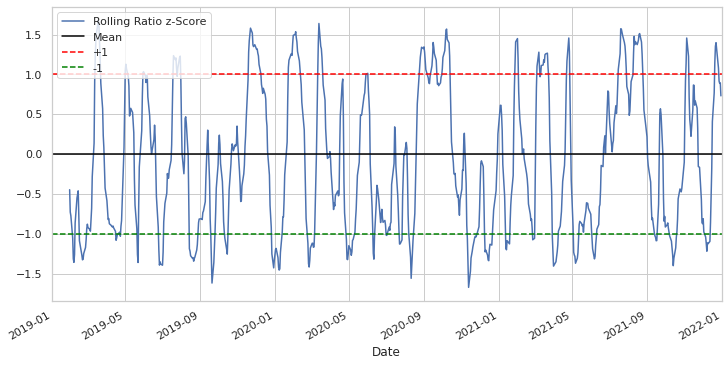

In [48]:
plt.figure(figsize=(12,6))
zscore_21_5.plot()
plt.xlim('2019-01-01', '2022-01-01')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

Below graphs outline the buy and sell signal based on the above logic during the study period from 2019 to 2022.

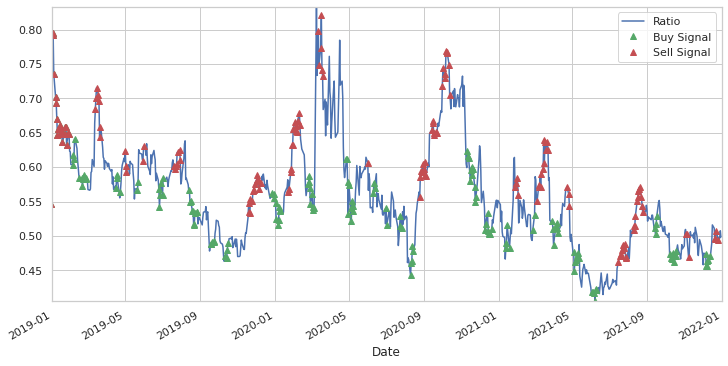

In [52]:
plt.figure(figsize=(12,6))

ratios.plot()
buy = ratios.copy()
sell = ratios.copy()
buy[zscore_21_5>-1] = 0
sell[zscore_21_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.xlim('2019-01-01', '2022-01-01')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

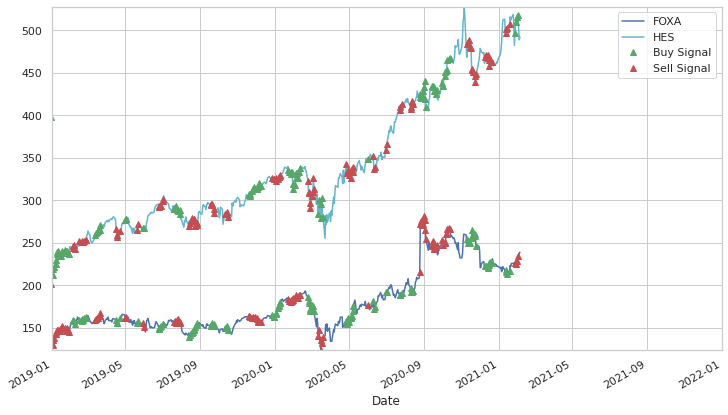

In [53]:
plt.figure(figsize=(12,7))
S1.plot(color='b')
S2.plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
buyR.plot(color='g', linestyle='None', marker='^')
sellR.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.xlim('2019-01-01', '2022-01-01')
plt.legend([coin_pair[0], coin_pair[1], 'Buy Signal', 'Sell Signal'])
plt.show()

Assuming a portfolio with zero capital to start with and unlimited margin loan from brokage account.
For each 1 lot of long and short positions performed at the time of the trading signals, the below function defined the expected P&L during the 3 year study period by trading the randomly chosen stock pair.

In [55]:

def trade(S1, S2, window1, window2):
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0        
    return money

In [60]:
print('The expected profit/(loss) of the pair trading strategy, assuming 1 lot of stock at for each long/short position during the 3 year period, amounts to USD $'+str(trade(df[coin_pair[0]], df[coin_pair[1]], 21, 5)))

The expected profit/(loss) of the pair trading strategy, assuming 1 lot of stock at for each long/short position during the 3 year period, amounts to USD $592.3646119630962


Proposed Machine Learning Approaches to improve the approach
- Deploy clustering techniques to further group and filter pairs using fundamental financial metrics as additional features (e.g. market cap, P/E, P/S, P/B, etc)
- Use RNN/GPU/LSTM to predict Price ratio movements